Практическая работа №3, Фамилия Имя 3ИСИП-122

Я не сверх уверен в работе!!!
Разведочный анализ данных

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Загрузка данных
df = pd.read_csv('vehicles.csv')

# Первичный анализ
print(df.head())
print(df.info())

   Unnamed: 0          id                                                url  \
0           0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1           1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2           2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3           3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4           4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition  ... size type  paint_col

Анализ данных
A. Описательная статистика

In [24]:
print(df.describe()) 

          Unnamed: 0            id         price          year      odometer  \
count  100000.000000  1.000000e+05  1.000000e+05  99572.000000  9.847900e+04   
mean    49999.500000  7.311985e+09  1.110640e+05   2010.944261  9.644995e+04   
std     28867.657797  4.670100e+06  1.471778e+07     10.056314  2.323362e+05   
min         0.000000  7.208550e+09  0.000000e+00   1900.000000  0.000000e+00   
25%     24999.750000  7.308846e+09  5.999000e+03   2008.000000  3.665700e+04   
50%     49999.500000  7.313515e+09  1.399500e+04   2013.000000  8.254300e+04   
75%     74999.250000  7.315694e+09  2.599000e+04   2017.000000  1.300000e+05   
max     99999.000000  7.316953e+09  3.024942e+09   2022.000000  1.000000e+07   

       county           lat          long  
count     0.0  99461.000000  99461.000000  
mean      NaN     36.794858   -107.618131  
std       NaN      5.975301     18.335293  
min       NaN    -84.122245   -158.599600  
25%       NaN     33.779214   -120.699752  
50%       NaN  

B. Анализ факторов, влияющих на цену

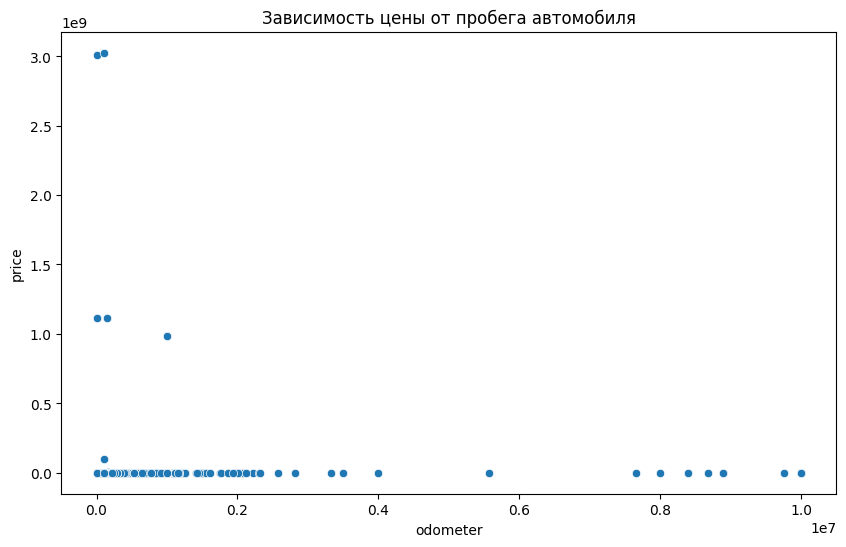

In [42]:
# Фильтрация числовых столбцов
df_numeric = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Зависимость цены от пробега автомобиля')
plt.show()

Визуализация данных
A. Гистограммы для числовых атрибутов

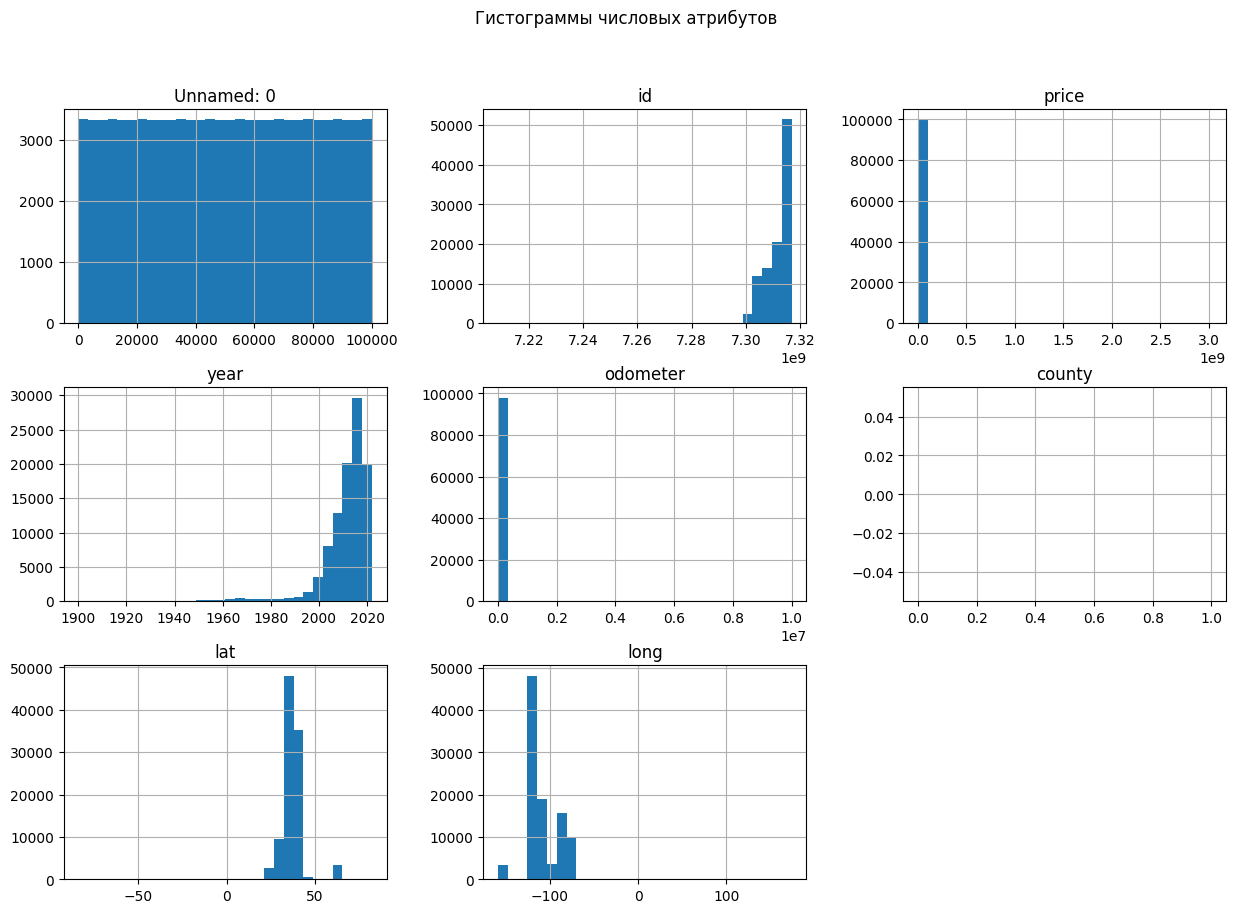

In [43]:
# Построение гистограмм для числовых столбцов
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Гистограммы числовых атрибутов')
plt.show()


B. Тепловая карта корреляции

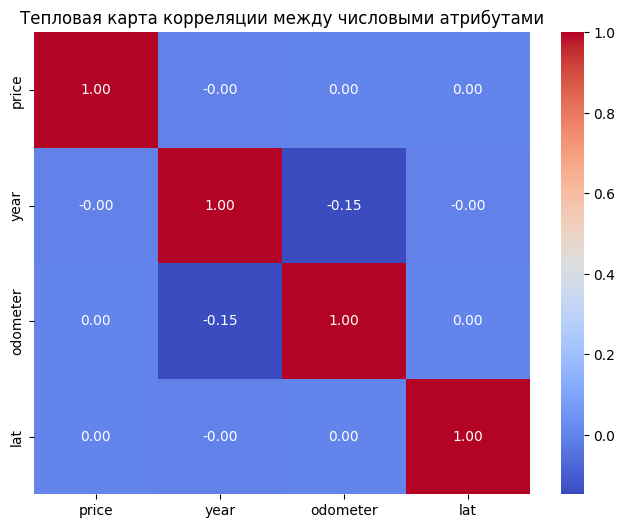

In [67]:
numeric_columns = df[['price', 'year', 'odometer', 'lat']]

# Строим тепловую карту корреляции
plt.figure(figsize=(8, 6))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции между числовыми атрибутами')
plt.show()

Выделение целевых признаков
Определяем, какие признаки будем использовать для обучения модели. Например, odometer (пробег) и price (цена):

In [81]:
X = df[['year', 'odometer', 'cylinders']]
y = df['price']

# Преобразование категориальных признаков в числовые
X_encoded = pd.get_dummies(X, drop_first=True)

# Проверка и обработка пропущенных значений
print(X_encoded.isnull().sum())

year           428
odometer      1521
cylinders    40579
dtype: int64


Обучение модели машинного обучения

In [82]:
# Выделение признаков и целевой переменной
X = df[['year', 'odometer', 'cylinders']]
y = df['price']

# Преобразование категориальных признаков в числовые
X_encoded = pd.get_dummies(X, drop_first=True)

# Проверка и обработка пропущенных значений
print(X_encoded.isnull().sum())
X_encoded = X_encoded.fillna(X_encoded.mean())

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем цены на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")


year           428
odometer      1521
cylinders    40579
dtype: int64
Среднеквадратичная ошибка (MSE): 25411594883.26
Коэффициент детерминации (R^2): -99.60
